# IE 8990 Course Project

## Importing library

In [1]:
# General Libraries #########################

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
# Loading GPU ##############################

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)


## Custom Activation Function

In [3]:
## Custom Activation Function

from tensorflow.keras import backend as K

def Swish(inputs):
    return inputs*K.sigmoid(inputs)
    #return K.maximum(inputs,0)
    #return K.minimum(K.maximum((K.sign(inputs)*K.pow(K.abs(inputs),1/3)),0),
    #inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 
    #0.05*x*K.sigmoid(inputs))


def CustFunc(inputs,p=0.00):
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
                                                       p*inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)
    
def CustFunc05(inputs,p=0.05):
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
                                                       p*inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)
def CustFunc15(inputs,p=0.15):
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
                                                       p*inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)
def CustFunc25(inputs,p=0.25):
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
                                                       p*inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)
def CustFunc35(inputs,p=0.35):
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
                                                       p*inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)
def CustFunc45(inputs,p=0.45):
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
                                                       p*inputs*K.sigmoid(inputs))
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)

    
def CustFunc1(inputs):
    #return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs),
    #0.05*inputs*K.sigmoid(inputs))
    return K.maximum(K.softsign(inputs),0) + K.minimum(inputs*K.sigmoid(inputs), 0)


In [4]:
# Plotting the Custom Function


### Setting the Coordinate Space

x = np.linspace(-5, 5, 100)

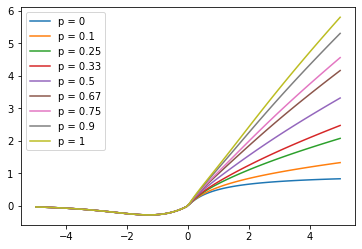

In [5]:
### Several Combinations of Mixed Function

X = [0, .1, .25,.33,.5,.67,.75,.90,1]

for i in X: 
    plt.plot(x,CustFunc(x,i), label="p = {}".format(i))
    
plt.legend()
plt.show()

## Importing Data

In [6]:
# Loading Datasets ########################

from tensorflow.keras.datasets import mnist

In [7]:
# Setting the training and test variables

## This loads the data row by row to make it a time series based dataset.

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

## LSTM Model

### Base Model

In [8]:
# Making the model


# Input Layer
model = keras.Sequential()
model.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
model.add(
    layers.LSTM(256, return_sequences = True, activation = 'tanh', 
                recurrent_activation='sigmoid'))
model.add(
    layers.LSTM(256, activation = 'tanh',recurrent_activation='sigmoid'))

# Output Layer
model.add(layers.Dense(10))

# Model Summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 256)         291840    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


### Reference for LSTM Model

def __init__(self,
               units,
               activation='tanh',
               recurrent_activation='sigmoid',
               use_bias=True,
               kernel_initializer='glorot_uniform',
               recurrent_initializer='orthogonal',
               bias_initializer='zeros',
               unit_forget_bias=True,
               kernel_regularizer=None,
               recurrent_regularizer=None,
               bias_regularizer=None,
               kernel_constraint=None,
               recurrent_constraint=None,
               bias_constraint=None,
               dropout=0.,
               recurrent_dropout=0.,
               *'*kwargs):
    super(LSTMCell, self).__init__(
        units,
        activation=activation,
        recurrent_activation=recurrent_activation,
        use_bias=use_bias,
        kernel_initializer=kernel_initializer,
        recurrent_initializer=recurrent_initializer,
        bias_initializer=bias_initializer,
        unit_forget_bias=unit_forget_bias,
        kernel_regularizer=kernel_regularizer,
        recurrent_regularizer=recurrent_regularizer,
        bias_regularizer=bias_regularizer,
        kernel_constraint=kernel_constraint,
        recurrent_constraint=recurrent_constraint,
        bias_constraint=bias_constraint,
        dropout=dropout,
        recurrent_dropout=recurrent_dropout,
        implementation=kwargs.pop('implementation', 2),
        **kwargs)

In [9]:
# Compiling the Model


model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [10]:

# Fitting the Model
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2, )


# Evaluate the Model

model.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 11s - loss: 0.3006 - accuracy: 0.9016 - 11s/epoch - 11ms/step
Epoch 2/10
938/938 - 8s - loss: 0.0846 - accuracy: 0.9749 - 8s/epoch - 8ms/step
Epoch 3/10
938/938 - 8s - loss: 0.0573 - accuracy: 0.9822 - 8s/epoch - 8ms/step
Epoch 4/10
938/938 - 8s - loss: 0.0440 - accuracy: 0.9862 - 8s/epoch - 8ms/step
Epoch 5/10
938/938 - 8s - loss: 0.0385 - accuracy: 0.9875 - 8s/epoch - 8ms/step
Epoch 6/10
938/938 - 8s - loss: 0.0323 - accuracy: 0.9900 - 8s/epoch - 8ms/step
Epoch 7/10
938/938 - 8s - loss: 0.0287 - accuracy: 0.9913 - 8s/epoch - 8ms/step
Epoch 8/10
938/938 - 8s - loss: 0.0228 - accuracy: 0.9929 - 8s/epoch - 8ms/step
Epoch 9/10
938/938 - 8s - loss: 0.0220 - accuracy: 0.9931 - 8s/epoch - 8ms/step
Epoch 10/10
938/938 - 8s - loss: 0.0199 - accuracy: 0.9939 - 8s/epoch - 8ms/step
157/157 - 1s - loss: 0.0341 - accuracy: 0.9911 - 1s/epoch - 7ms/step


[0.03406180813908577, 0.991100013256073]

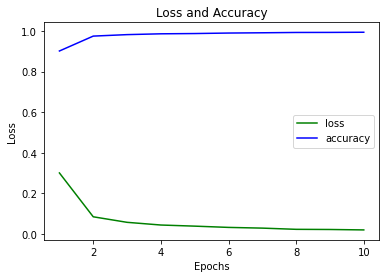

In [11]:
loss_base = history.history['loss']
acc_base = history.history['accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_base, 'g', label='loss')
plt.plot(epochs, acc_base, 'b', label='accuracy')
plt.title('Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Squish Function

In [12]:
# Making the model


# Input Layer
modelAF = keras.Sequential()
modelAF.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelAF.add(
    layers.LSTM(256, return_sequences = True, activation = CustFunc, 
                recurrent_activation='sigmoid'))
modelAF.add(
    layers.LSTM(256, activation = CustFunc,recurrent_activation='sigmoid'))

# Output Layer
modelAF.add(layers.Dense(10))

# Model Summary
print(modelAF.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Compiling the Model


modelAF.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


# Fitting the Model

history_AF = modelAF.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelAF.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 274s - loss: 0.3854 - accuracy: 0.8730 - 274s/epoch - 292ms/step
Epoch 2/10
938/938 - 271s - loss: 0.1010 - accuracy: 0.9692 - 271s/epoch - 289ms/step
Epoch 3/10
938/938 - 272s - loss: 0.0674 - accuracy: 0.9796 - 272s/epoch - 290ms/step
Epoch 4/10
938/938 - 272s - loss: 0.0510 - accuracy: 0.9846 - 272s/epoch - 290ms/step
Epoch 5/10
938/938 - 271s - loss: 0.0425 - accuracy: 0.9866 - 271s/epoch - 289ms/step
Epoch 6/10
938/938 - 272s - loss: 0.0340 - accuracy: 0.9896 - 272s/epoch - 290ms/step
Epoch 7/10
938/938 - 273s - loss: 0.0303 - accuracy: 0.9905 - 273s/epoch - 291ms/step
Epoch 8/10
938/938 - 271s - loss: 0.0246 - accuracy: 0.9919 - 271s/epoch - 289ms/step
Epoch 9/10
938/938 - 272s - loss: 0.0220 - accuracy: 0.9928 - 272s/epoch - 290ms/step
Epoch 10/10
938/938 - 276s - loss: 0.0212 - accuracy: 0.9932 - 276s/epoch - 294ms/step
157/157 - 9s - loss: 0.0380 - accuracy: 0.9887 - 9s/epoch - 56ms/step


[0.0379953570663929, 0.9886999726295471]

In [14]:
loss_AF = history_AF.history['loss']
acc_AF = history_AF.history['accuracy']

In [15]:
# Making the model


# Input Layer
modelRAF = keras.Sequential()
modelRAF.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelRAF.add(
    layers.LSTM(256, return_sequences = True, activation = 'tanh', 
                recurrent_activation= CustFunc))
modelRAF.add(
    layers.LSTM(256, activation = 'tanh',recurrent_activation = CustFunc))

# Output Layer
modelRAF.add(layers.Dense(10))

# Model Summary
print(modelRAF.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Compiling the Model


modelRAF.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

history_RAF = modelRAF.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelRAF.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 361s - loss: 2.3016 - accuracy: 0.1116 - 361s/epoch - 385ms/step
Epoch 2/10
938/938 - 356s - loss: 0.4030 - accuracy: 0.8627 - 356s/epoch - 380ms/step
Epoch 3/10
938/938 - 358s - loss: 0.0854 - accuracy: 0.9752 - 358s/epoch - 382ms/step
Epoch 4/10
938/938 - 354s - loss: 0.0565 - accuracy: 0.9833 - 354s/epoch - 378ms/step
Epoch 5/10
938/938 - 353s - loss: 0.0438 - accuracy: 0.9871 - 353s/epoch - 376ms/step
Epoch 6/10
938/938 - 356s - loss: 0.0368 - accuracy: 0.9888 - 356s/epoch - 379ms/step
Epoch 7/10
938/938 - 357s - loss: 0.0293 - accuracy: 0.9912 - 357s/epoch - 381ms/step
Epoch 8/10
938/938 - 360s - loss: 0.0285 - accuracy: 0.9912 - 360s/epoch - 384ms/step
Epoch 9/10
938/938 - 360s - loss: 0.0220 - accuracy: 0.9934 - 360s/epoch - 384ms/step
Epoch 10/10
938/938 - 356s - loss: 0.0182 - accuracy: 0.9948 - 356s/epoch - 379ms/step
157/157 - 12s - loss: 0.0389 - accuracy: 0.9898 - 12s/epoch - 75ms/step


[0.03892815113067627, 0.989799976348877]

In [17]:
loss_RAF = history_RAF.history['loss']
acc_RAF = history_RAF.history['accuracy']

### ReLU function

In [18]:
# Making the model


# Input Layer
modelR = keras.Sequential()
modelR.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelR.add(
    layers.LSTM(256, return_sequences = True, activation = 'relu', 
                recurrent_activation='sigmoid'))
modelR.add(
    layers.LSTM(256, activation = 'relu',recurrent_activation='sigmoid'))

# Output Layer
modelR.add(layers.Dense(10))

# Model Summary
print(modelR.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_7 (LSTM)               (None, 256)               525312    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
# Compiling the Model


modelR.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

historyR = modelR.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelR.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 136s - loss: 0.4601 - accuracy: 0.8533 - 136s/epoch - 145ms/step
Epoch 2/10
938/938 - 135s - loss: 0.1070 - accuracy: 0.9677 - 135s/epoch - 144ms/step
Epoch 3/10
938/938 - 135s - loss: 0.0706 - accuracy: 0.9786 - 135s/epoch - 144ms/step
Epoch 4/10
938/938 - 135s - loss: 0.0549 - accuracy: 0.9833 - 135s/epoch - 144ms/step
Epoch 5/10
938/938 - 134s - loss: 0.0472 - accuracy: 0.9854 - 134s/epoch - 143ms/step
Epoch 6/10
938/938 - 133s - loss: 0.0409 - accuracy: 0.9873 - 133s/epoch - 142ms/step
Epoch 7/10
938/938 - 134s - loss: 0.0343 - accuracy: 0.9894 - 134s/epoch - 143ms/step
Epoch 8/10
938/938 - 135s - loss: 0.0312 - accuracy: 0.9906 - 135s/epoch - 144ms/step
Epoch 9/10
938/938 - 134s - loss: 0.0257 - accuracy: 0.9920 - 134s/epoch - 142ms/step
Epoch 10/10
938/938 - 134s - loss: 0.0286 - accuracy: 0.9911 - 134s/epoch - 143ms/step
157/157 - 5s - loss: 0.0421 - accuracy: 0.9872 - 5s/epoch - 29ms/step


[0.042086515575647354, 0.9872000217437744]

In [20]:
loss_R = historyR.history['loss']
acc_R = historyR.history['accuracy']

In [21]:
# Making the model


# Input Layer
modelRR = keras.Sequential()
modelRR.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelRR.add(
    layers.LSTM(256, return_sequences = True, activation = 'tanh', 
                recurrent_activation='relu'))
modelRR.add(
    layers.LSTM(256, activation = 'tanh',recurrent_activation='relu'))

# Output Layer
modelRR.add(layers.Dense(10))

# Model Summary
print(modelRR.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_9 (LSTM)               (None, 256)               525312    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
# Compiling the Model


modelRR.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

historyRR = modelRR.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelRR.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 136s - loss: 0.5441 - accuracy: 0.8208 - 136s/epoch - 145ms/step
Epoch 2/10
938/938 - 134s - loss: 0.1337 - accuracy: 0.9606 - 134s/epoch - 143ms/step
Epoch 3/10
938/938 - 135s - loss: 0.1182 - accuracy: 0.9665 - 135s/epoch - 143ms/step
Epoch 4/10
938/938 - 133s - loss: 0.0878 - accuracy: 0.9745 - 133s/epoch - 142ms/step
Epoch 5/10
938/938 - 135s - loss: 0.0829 - accuracy: 0.9765 - 135s/epoch - 143ms/step
Epoch 6/10
938/938 - 133s - loss: 0.0689 - accuracy: 0.9804 - 133s/epoch - 141ms/step
Epoch 7/10
938/938 - 133s - loss: 0.0645 - accuracy: 0.9811 - 133s/epoch - 142ms/step
Epoch 8/10
938/938 - 134s - loss: 0.0570 - accuracy: 0.9837 - 134s/epoch - 143ms/step
Epoch 9/10
938/938 - 134s - loss: 0.0711 - accuracy: 0.9797 - 134s/epoch - 143ms/step
Epoch 10/10
938/938 - 135s - loss: 0.0584 - accuracy: 0.9828 - 135s/epoch - 144ms/step
157/157 - 5s - loss: 0.1710 - accuracy: 0.9425 - 5s/epoch - 29ms/step


[0.17101824283599854, 0.9424999952316284]

In [23]:
loss_RR = historyRR.history['loss']
acc_RR = historyRR.history['accuracy']

### Swish Function

In [25]:
# Making the model


# Input Layer
modelS = keras.Sequential()
modelS.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelS.add(
    layers.LSTM(256, return_sequences = True, activation = Swish, 
                recurrent_activation='sigmoid'))
modelS.add(
    layers.LSTM(256, activation = Swish,recurrent_activation='sigmoid'))

# Output Layer
modelS.add(layers.Dense(10))

# Model Summary
print(modelS.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, None, 256)         291840    
                                                                 
 lstm_11 (LSTM)              (None, 256)               525312    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
# Compiling the Model


modelS.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

historyS = modelS.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelS.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 170s - loss: 0.6607 - accuracy: 0.7753 - 170s/epoch - 182ms/step
Epoch 2/10
938/938 - 171s - loss: 0.1354 - accuracy: 0.9587 - 171s/epoch - 182ms/step
Epoch 3/10
938/938 - 171s - loss: 0.0820 - accuracy: 0.9744 - 171s/epoch - 183ms/step
Epoch 4/10
938/938 - 172s - loss: 0.0588 - accuracy: 0.9823 - 172s/epoch - 183ms/step
Epoch 5/10
938/938 - 170s - loss: 0.0455 - accuracy: 0.9854 - 170s/epoch - 181ms/step
Epoch 6/10
938/938 - 169s - loss: 0.0370 - accuracy: 0.9887 - 169s/epoch - 180ms/step
Epoch 7/10
938/938 - 173s - loss: 0.0334 - accuracy: 0.9897 - 173s/epoch - 184ms/step
Epoch 8/10
938/938 - 172s - loss: 0.0306 - accuracy: 0.9900 - 172s/epoch - 183ms/step
Epoch 9/10
938/938 - 174s - loss: 0.0238 - accuracy: 0.9926 - 174s/epoch - 186ms/step
Epoch 10/10
938/938 - 174s - loss: 0.0241 - accuracy: 0.9925 - 174s/epoch - 185ms/step
157/157 - 5s - loss: 0.0365 - accuracy: 0.9882 - 5s/epoch - 33ms/step


[0.03652001544833183, 0.9882000088691711]

In [27]:
loss_S = historyS.history['loss']
acc_S = historyS.history['accuracy']

In [28]:
# Making the model


# Input Layer
modelSR = keras.Sequential()
modelSR.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelSR.add(
    layers.LSTM(256, return_sequences = True, activation = 'tanh', 
                recurrent_activation=Swish))
modelSR.add(
    layers.LSTM(256, activation = 'tanh',recurrent_activation=Swish))

# Output Layer
modelSR.add(layers.Dense(10))

# Model Summary
print(modelSR.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, None, 256)         291840    
                                                                 
 lstm_13 (LSTM)              (None, 256)               525312    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
# Compiling the Model


modelSR.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

historySR = modelSR.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelSR.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 193s - loss: 2.1998 - accuracy: 0.1673 - 193s/epoch - 206ms/step
Epoch 2/10
938/938 - 191s - loss: 0.6255 - accuracy: 0.7884 - 191s/epoch - 204ms/step
Epoch 3/10
938/938 - 191s - loss: 0.2406 - accuracy: 0.9261 - 191s/epoch - 203ms/step
Epoch 4/10
938/938 - 193s - loss: 2.7624 - accuracy: 0.4051 - 193s/epoch - 206ms/step
Epoch 5/10
938/938 - 191s - loss: 1.9513 - accuracy: 0.3921 - 191s/epoch - 204ms/step
Epoch 6/10
938/938 - 189s - loss: 1.8397 - accuracy: 0.4491 - 189s/epoch - 201ms/step
Epoch 7/10
938/938 - 187s - loss: 1.7553 - accuracy: 0.4752 - 187s/epoch - 199ms/step
Epoch 8/10
938/938 - 187s - loss: 1.6859 - accuracy: 0.4886 - 187s/epoch - 199ms/step
Epoch 9/10
938/938 - 185s - loss: 1.8491 - accuracy: 0.4029 - 185s/epoch - 197ms/step
Epoch 10/10
938/938 - 189s - loss: 1.6941 - accuracy: 0.4744 - 189s/epoch - 201ms/step
157/157 - 6s - loss: 1.5770 - accuracy: 0.4990 - 6s/epoch - 37ms/step


[1.5770384073257446, 0.49900001287460327]

In [30]:
loss_SR = historySR.history['loss']
acc_SR = historySR.history['accuracy']

### SoftMax Function

In [31]:
# Making the model


# Input Layer
modelSM = keras.Sequential()
modelSM.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelSM.add(
    layers.LSTM(256, return_sequences = True, activation = 'softmax', 
                recurrent_activation='sigmoid'))
modelSM.add(
    layers.LSTM(256, activation = 'softmax',recurrent_activation='sigmoid'))

# Output Layer
modelSM.add(layers.Dense(10))

# Model Summary
print(modelSM.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, None, 256)         291840    
                                                                 
 lstm_15 (LSTM)              (None, 256)               525312    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# Compiling the Model


modelSM.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

historySM = modelSM.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelSM.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 150s - loss: 2.3016 - accuracy: 0.1120 - 150s/epoch - 160ms/step
Epoch 2/10
938/938 - 145s - loss: 2.3013 - accuracy: 0.1124 - 145s/epoch - 155ms/step
Epoch 3/10
938/938 - 147s - loss: 2.3013 - accuracy: 0.1124 - 147s/epoch - 156ms/step
Epoch 4/10
938/938 - 145s - loss: 2.3013 - accuracy: 0.1124 - 145s/epoch - 154ms/step
Epoch 5/10
938/938 - 145s - loss: 2.3014 - accuracy: 0.1124 - 145s/epoch - 155ms/step
Epoch 6/10
938/938 - 145s - loss: 2.3014 - accuracy: 0.1124 - 145s/epoch - 155ms/step
Epoch 7/10
938/938 - 146s - loss: 2.3013 - accuracy: 0.1124 - 146s/epoch - 155ms/step
Epoch 8/10
938/938 - 146s - loss: 2.3014 - accuracy: 0.1124 - 146s/epoch - 156ms/step
Epoch 9/10
938/938 - 146s - loss: 2.3014 - accuracy: 0.1124 - 146s/epoch - 155ms/step
Epoch 10/10
938/938 - 148s - loss: 2.3014 - accuracy: 0.1124 - 148s/epoch - 157ms/step
157/157 - 5s - loss: 2.3010 - accuracy: 0.1135 - 5s/epoch - 31ms/step


[2.301018714904785, 0.11349999904632568]

In [33]:
loss_SM = historySM.history['loss']
acc_SM = historySM.history['accuracy']

In [34]:
# Making the model


# Input Layer
modelSMR = keras.Sequential()
modelSMR.add(keras.Input(shape = (None, 28))) #28 pixels per time step

# Hidden Layers
modelSMR.add(
    layers.LSTM(256, return_sequences = True, activation = 'tanh', 
                recurrent_activation='softmax'))
modelSMR.add(
    layers.LSTM(256, activation = 'tanh',recurrent_activation='softmax'))

# Output Layer
modelSMR.add(layers.Dense(10))

# Model Summary
print(modelSM.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, None, 256)         291840    
                                                                 
 lstm_15 (LSTM)              (None, 256)               525312    
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
# Compiling the Model


modelSMR.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Fitting the Model

historySMR = modelSMR.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)


# Evaluate the Model

modelSMR.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Epoch 1/10
938/938 - 156s - loss: 2.3015 - accuracy: 0.1116 - 156s/epoch - 166ms/step
Epoch 2/10
938/938 - 153s - loss: 2.3013 - accuracy: 0.1124 - 153s/epoch - 163ms/step
Epoch 3/10
938/938 - 152s - loss: 2.3013 - accuracy: 0.1124 - 152s/epoch - 162ms/step
Epoch 4/10
938/938 - 156s - loss: 2.3013 - accuracy: 0.1124 - 156s/epoch - 166ms/step
Epoch 5/10
938/938 - 152s - loss: 2.3013 - accuracy: 0.1124 - 152s/epoch - 163ms/step
Epoch 6/10
938/938 - 154s - loss: 2.3013 - accuracy: 0.1124 - 154s/epoch - 164ms/step
Epoch 7/10
938/938 - 152s - loss: 2.3013 - accuracy: 0.1124 - 152s/epoch - 162ms/step
Epoch 8/10
938/938 - 150s - loss: 2.3013 - accuracy: 0.1124 - 150s/epoch - 160ms/step
Epoch 9/10
938/938 - 154s - loss: 2.3013 - accuracy: 0.1124 - 154s/epoch - 164ms/step
Epoch 10/10
938/938 - 157s - loss: 2.3013 - accuracy: 0.1124 - 157s/epoch - 168ms/step
157/157 - 6s - loss: 2.3010 - accuracy: 0.1135 - 6s/epoch - 35ms/step


[2.3009729385375977, 0.11349999904632568]

In [36]:
loss_SMR = historySMR.history['loss']
acc_SMR = historySMR.history['accuracy']

In [37]:
## Results Analysis

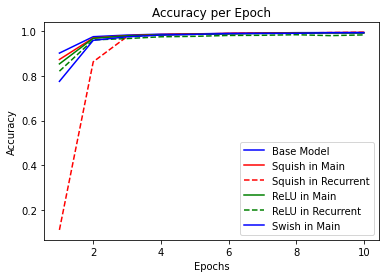

In [41]:
# Plotting Accuracy


epochs = range(1,11)
plt.plot(epochs, acc_base, 'b', label='Base Model')
plt.plot(epochs, acc_AF, 'r-', label='Squish in Main')
plt.plot(epochs, acc_RAF, 'r--', label='Squish in Recurrent')
plt.plot(epochs, acc_R, 'g-', label='ReLU in Main')
plt.plot(epochs, acc_RR, 'g--', label='ReLU in Recurrent')
plt.plot(epochs, acc_S, 'b-', label='Swish in Main')
#plt.plot(epochs, acc_SR, 'b--', label='Swish in Recurrent')
#plt.plot(epochs, acc_SM, 'm-', label='SoftMax in Main')
#plt.plot(epochs, acc_SM, 'm--', label='SoftMax in Recurrent')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

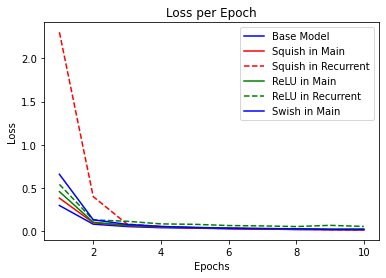

In [40]:
# Plotting Loss


epochs = range(1,11)
plt.plot(epochs, loss_base, 'b', label='Base Model')
plt.plot(epochs, loss_AF, 'r-', label='Squish in Main')
plt.plot(epochs, loss_RAF, 'r--', label='Squish in Recurrent')
plt.plot(epochs, loss_R, 'g-', label='ReLU in Main')
plt.plot(epochs, loss_RR, 'g--', label='ReLU in Recurrent')
plt.plot(epochs, loss_S, 'b-', label='Swish in Main')
#plt.plot(epochs, loss_SR, 'b--', label='Swish in Recurrent')
#plt.plot(epochs, loss_SM, 'm-', label='SoftMax in Main')
#plt.plot(epochs, loss_SM, 'm--', label='SoftMax in Recurrent')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
### Loss Landscapes